In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.shape

(1338, 7)

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Categorical features:
    -sex
    -smoker
    -region
    

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data Visualization

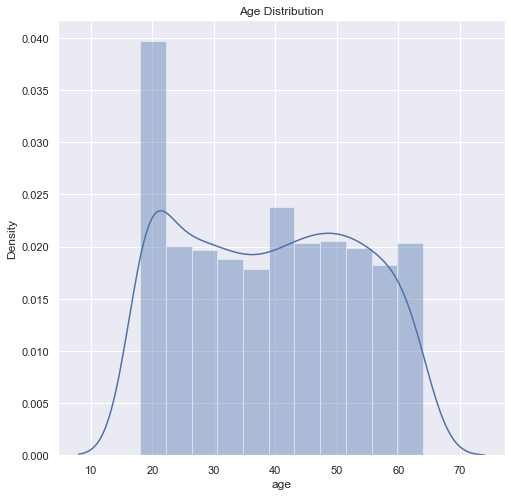

In [15]:
#age column
sns.set()
plt.figure(figsize=(8,8))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

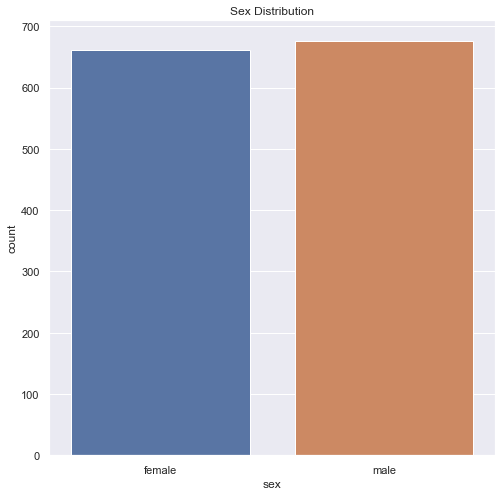

male      676
female    662
Name: sex, dtype: int64

In [21]:
#sex column
plt.figure(figsize=(8,8))
sns.countplot(x='sex',data=df)
plt.title('Sex Distribution')
plt.show()
df['sex'].value_counts()

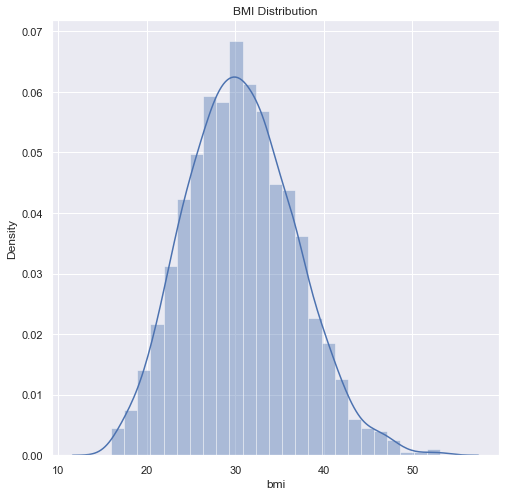

In [25]:
#bmi column
plt.figure(figsize=(8,8))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI range--->18.5 to 24.9

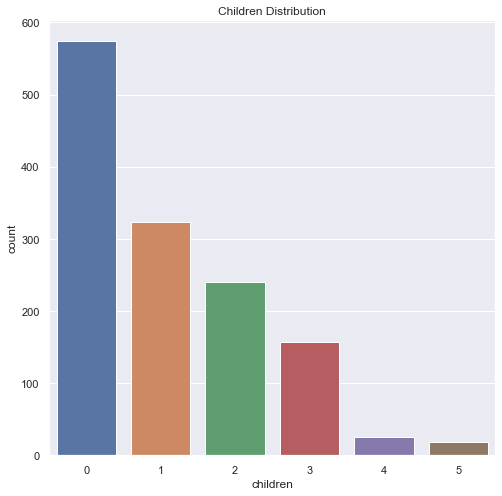

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [26]:
#children column
plt.figure(figsize=(8,8))
sns.countplot(x='children',data=df)
plt.title('Children Distribution')
plt.show()
df['children'].value_counts()

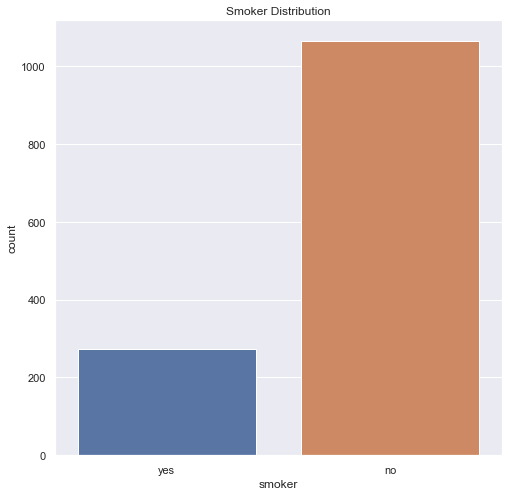

no     1064
yes     274
Name: smoker, dtype: int64

In [27]:
#smoker column
plt.figure(figsize=(8,8))
sns.countplot(x='smoker',data=df)
plt.title('Smoker Distribution')
plt.show()
df['smoker'].value_counts()

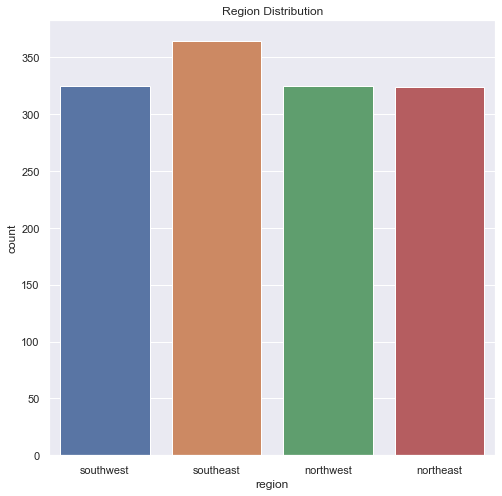

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [28]:
#region column
plt.figure(figsize=(8,8))
sns.countplot(x='region',data=df)
plt.title('Region Distribution')
plt.show()
df['region'].value_counts()

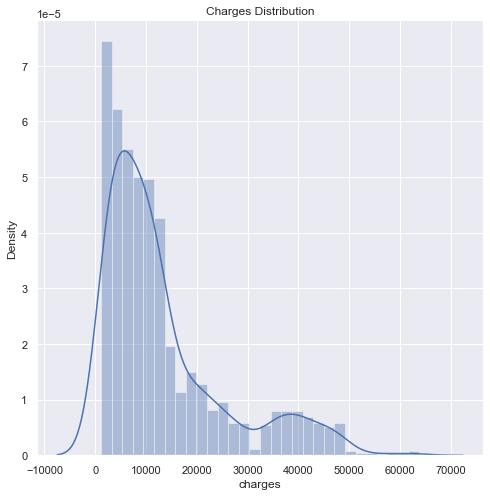

In [29]:
#charges column
plt.figure(figsize=(8,8))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

# Data Pre-Processing
Encoding the categorical features

In [35]:
#encoding sex column
df.replace({'sex':{'male':0,'female':1}},inplace=True)
                   
#encoding smoker column
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
                   
#encoding region column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)              

Splitting the features and target

In [36]:
x=df.drop(columns='charges',axis=1)
y=df['charges']

In [37]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [38]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into training and testing data

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=5)

In [40]:
print(x.shape,y.shape,x_test.shape)

(1338, 6) (1338,) (669, 6)


# Model training
Linear Regression

In [41]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [43]:
#model evaluation
#prediction of training data
lr_pred=lr.predict(x_train)

#r_squared value
r2_train=metrics.r2_score(y_train,lr_pred)
print('R Squared value:',r2_train)

R Squared value: 0.7576651387398805


In [44]:
#prediction of test data
lm_pred=lr.predict(x_test)
#r_squared data
r2_test=metrics.r2_score(y_test,lm_pred)
print('R squared value:',r2_test)

R squared value: 0.736789067391205


# Building  a Predictive system

In [47]:
input_data=(50,0,30.970,3,1,3)


#changing input data to a numpy array
na=np.asarray(input_data)

#reshape the array
nreshaped=na.reshape(1,-1)

prediction=lr.predict(nreshaped)
print(prediction)
print("The Insurance cost is USD",prediction[0])

[12997.31853236]
The Insurance cost is USD 12997.318532356077
